# House Price Prediction using Linear Regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

%matplotlib inline

In [2]:
#loading dataset
data= pd.read_csv("house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.shape

(21613, 21)

In [5]:
#checking if the NaN are available
data.isnull().sum()  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
#drop samples with missing values
data.dropna(inplace=True)


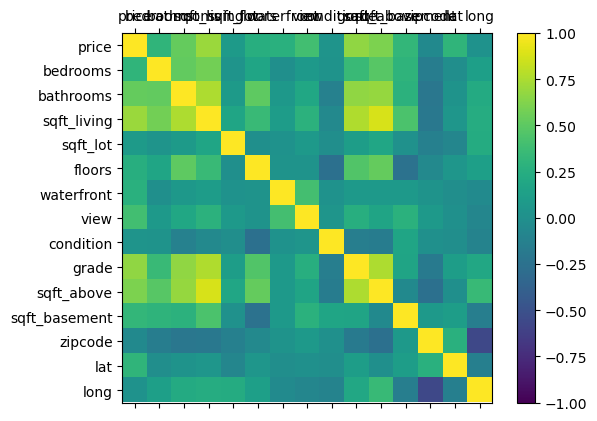

In [8]:
#correlation
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [9]:
#converting nominal and ordinal features into category
data['waterfront'] = data['waterfront'].astype('category')
data['view'] = data['view'].astype('category')
data['condition'] = data['condition'].astype('category')
data['grade'] = data['grade'].astype('category')
data['zipcode'] = data['zipcode'].astype('category')


In [10]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above        float64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

# Exploratory Analysis

<Axes: xlabel='sqft_living', ylabel='price'>

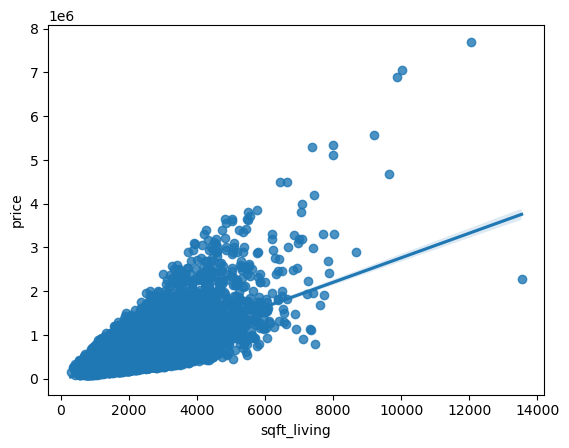

In [11]:
#sns.set_style()
sns.regplot(x='sqft_living',y='price',data=data)

<Axes: xlabel='sqft_basement', ylabel='price'>

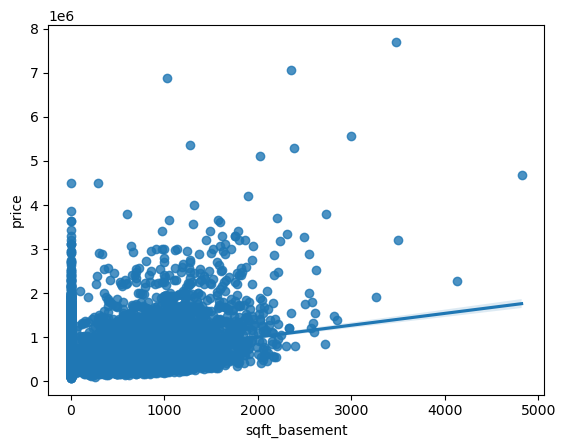

In [12]:
sns.regplot(x='sqft_basement',y='price',data=data)

<Axes: xlabel='sqft_above', ylabel='price'>

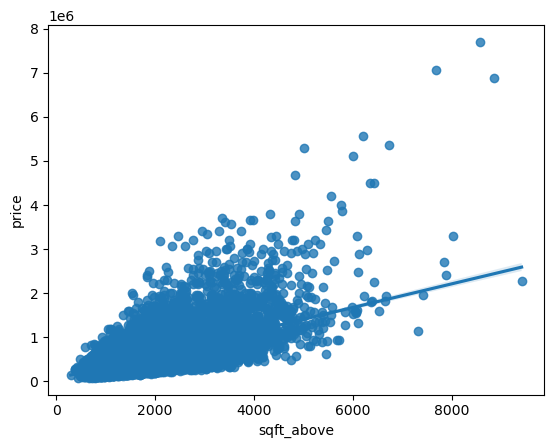

In [13]:
sns.regplot(x='sqft_above',y='price',data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

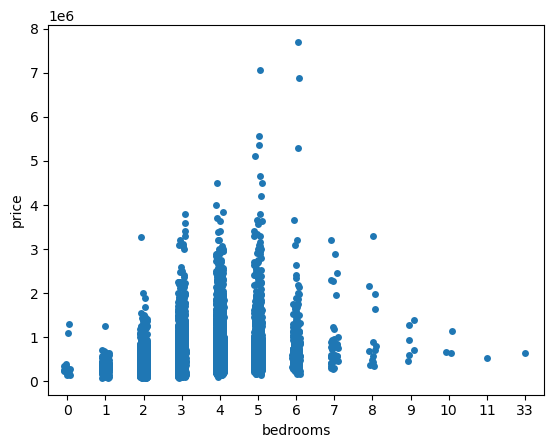

In [14]:
sns.stripplot(x='bedrooms', y='price',data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

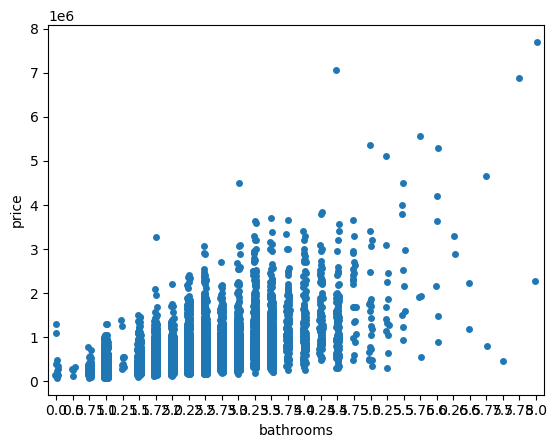

In [15]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

<Axes: xlabel='grade', ylabel='price'>

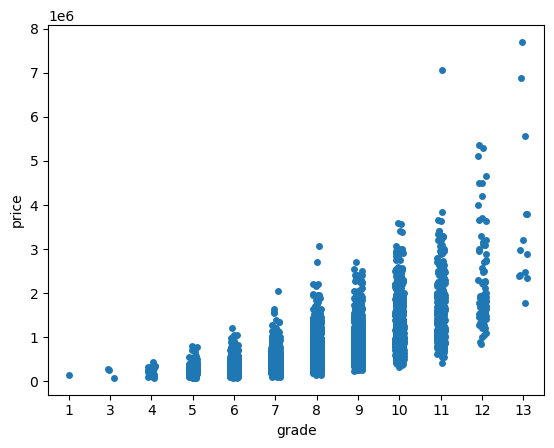

In [16]:
sns.stripplot(x='grade', y='price',data=data, size=5)

In [66]:
df[df.price==df.price.max()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long
7252,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570.0,3480,98102,47.6298,-122.323


In [18]:
df[df.price==df.price.min()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long
1149,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670.0,0,98022,47.2638,-121.906


In [19]:
df[(df.bedrooms==1)&(df.floors==1)][["price"]]

,price
154,350000.0
264,369900.0
350,299000.0
465,80000.0
648,157000.0
...,...
20017,290000.0
20853,325000.0
21043,375000.0
21240,525000.0


In [20]:
data.yr_built.value_counts(ascending=True)

yr_built
1934     21
1935     24
1902     27
1901     29
1933     30
       ... 
2003    422
2004    433
2005    450
2006    454
2014    559
Name: count, Length: 116, dtype: int64

In [21]:
len(data[data.yr_built==2014])

559

## Feature Engineering

In [27]:
X=df.drop("price",axis=1)
y=df.price

In [28]:
#splitting data
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(17288, 14)
(17288, 1)
(4323, 14)
(4323, 1)


## LinearRegression

In [37]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred=lr.predict(X_test)

In [39]:
lr.score(X_train,y_train)

0.6724137469655482

In [40]:
lr.score(X_test,y_test)

0.6888752861632239

In [41]:
mean_squared_error(y_test,y_pred)

0.34485658672584657

In [42]:
r2_score(y_test,y_pred)

0.6888752861632239

## RandomForestRegressor

In [43]:
reg=RandomForestRegressor(n_estimators=400)
reg.fit(X_train,y_train)

/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=400)

In [44]:
reg.score(X_train,y_train)

0.9828156492601179

In [45]:
reg.score(X_test,y_test)

0.8832747393254934

In [46]:
y_pr=reg.predict(X_test)

In [47]:
r2_score(y_test,y_pr)

0.8832747393254934

In [48]:
mean_squared_error(y_test,y_pr)

0.12938051267124043

In [49]:
cross_val_score(RandomForestRegressor(n_estimators=100),X,y,cv=3)

/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0.86992459, 0.86901179, 0.87060142])

## DecisionTreeRegressor

In [50]:
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [51]:
DT.score(X_train,y_train)

0.999246233307815

In [52]:
y_pred=DT.predict(X_test)

In [53]:
DT.score(X_test,y_test)

0.749707675266568

In [54]:
r2_score(y_test,y_pred)

0.749707675266568

In [55]:
mean_squared_error(y_test,y_pred)

0.2774288025107886

In [56]:
cross_val_score(DecisionTreeRegressor(),X,y,cv=3)

array([0.78163105, 0.7785968 , 0.74164201])

## SVR

In [57]:
svr=SVR(C=10,gamma="auto")
svr.fit(X_train,y_train)
svr.score(X_train,y_train)

/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9164900977661201

In [58]:
svr.score(X_test,y_test)

0.7889144922086371

In [59]:
svr.score(X_train,y_train)

0.9164900977661201

In [60]:
y_svr_pred=svr.predict(X_test)

In [61]:
svr.score(X_test,y_test)

0.7889144922086371

In [62]:
r2_score(y_test,y_svr_pred)

0.7889144922086371

In [63]:
mean_squared_error(y_test,y_svr_pred)

0.2339712163219899

In [64]:
cross_val_score(SVR(C=10,gamma="auto"),X,y,cv=3)

/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/indukatta/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.77202631, 0.75707547, 0.82774135])